In [2]:
# %load kinase_single_well_spectra_experiment


# get_ipython().run_line_magic('matplotlib', 'inline')
%matplotlib inline 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os
from matplotlib.offsetbox import AnchoredText
import matplotlib.cm as cm
import pandas as pd
from matplotlib.ticker import FormatStrFormatter
from matplotlib.ticker import FormatStrFormatter
import matplotlib
from glob import glob


# In[13]:


import assaytools


# In[14]:


from assaytools import platereader


filename = ['p38_Sta_ab_20190328_144239.xml']

datapath = 'infinite_results'


# In[16]:


concentrations = np.array([2.000e-05, 1.320e-05, 8.660e-06, 
                           5.700e-06, 3.750e-06, 2.470e-06,
                           1.620e-06, 1.0700e-06, 7.02e-07,
                           4.62e-07, 3.04e-07, 2.00e-07])


# In[17]:

reads = list()
nreads = len(filename)
for read in range(nreads):
    read = platereader.read_icontrol_xml(os.path.join(datapath, filename[read]))
    reads.append(read)

## Ex 296 nm/Em 396 nm

In [3]:
Stauro_prot = np.zeros([12, 65])
Stauro_buff = np.zeros([12, 65])
ncol = 12

label = 'ex296_scan_top_gain100'

for well in range(ncol):
    index = well + 1
    prot_well_name = 'A%s' % index
    buff_well_name = 'B%s' % index
    
    measurements_prot = list(reads[0]['ex296_scan_top_gain100'][prot_well_name].values())
    measurements_prot = [i if i != 'OVER' else 70000 for i in measurements_prot] 
    measurements_buff = list(reads[0]['ex296_scan_top_gain100'][buff_well_name].values())
    measurements_buff = [i if i != 'OVER' else 0 for i in measurements_buff] 
    
    Stauro_prot[well] = np.array(measurements_prot)
    Stauro_buff[well] = np.array(measurements_buff)
    print(prot_well_name)
    print(Stauro_prot[well])

A1
[  34812. 2522286. 1993697. 1635653. 1334354. 1121930.  685138.  529356.
  436262.  365314.  306425.  265283.  216451.  180116.  158813.  137771.
  119290.  145251.  209189.  179888.  151839.  126126.  108388.   99149.
  100603.  103579.  103957.   97483.   95588.   91958.   90629.   90647.
   64862.   54795.   46222.   36256.   26713.   22179.   19857.   19421.
   19238.   19503.   20068.   20220.   20152.   20678.   20362.   19837.
   19788.   18902.   18355.   17229.   16482.   14870.   14099.   13023.
   12023.   10883.   10010.    9114.    8023.    7224.    6400.    5733.
    5128.]
A2
[2.032900e+04 2.584714e+06 2.024343e+06 1.657856e+06 1.402782e+06
 1.144216e+06 7.970130e+05 5.734860e+05 4.784320e+05 3.998650e+05
 3.328310e+05 2.862580e+05 2.337230e+05 1.974120e+05 1.725520e+05
 1.507150e+05 1.305430e+05 1.671820e+05 2.095450e+05 1.804250e+05
 1.546870e+05 1.279460e+05 1.061560e+05 9.993700e+04 9.923200e+04
 1.038300e+05 1.026430e+05 9.855300e+04 9.494200e+04 9.414500e+04
 9.

## Plot fluorescence across all 65 wavelengths

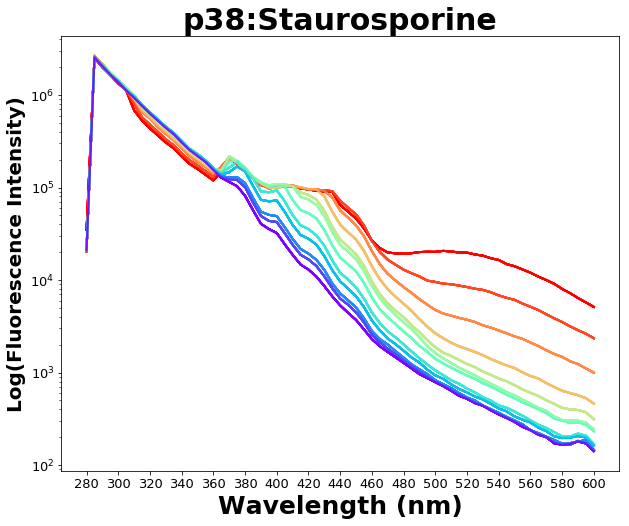

In [23]:
# buffer_color = current_palette[3]

fig,axes = plt.subplots(nrows=1,ncols=1,figsize=(10,8))

ncol=12
index = 0

# Plot fluorescence
for well in range(ncol):
    index = well + 1
    prot_well_name = 'A%s' % index
    buff_well_name = 'B%s' % index
    x_values = list(reads[0][label][prot_well_name].keys())
    color = cm.rainbow(np.linspace(0,1,12))
    gray = cm.Greys(np.linspace(0,1,12))
    color = np.flip(color,axis=0)
    for read, c in zip(Stauro_prot, color):
        plt.semilogy(x_values, read, c=c, linestyle='solid', linewidth=2, alpha=0.75)
#     for read, c in zip(Stauro_buff, gray):
#         plt.semilogy(x_values, read, c=c, linestyle='dashed', linewidth=2, alpha=0.75)
    axes.xaxis.set_major_locator(plt.MaxNLocator(20))

    plt.title('p38:Staurosporine', fontsize=30, fontweight='bold')
    plt.xlabel('Wavelength (nm)', fontsize=25, fontweight='bold')
    plt.ylabel('Log(Fluorescence Intensity)', fontsize=20, fontweight='bold')
    plt.tick_params(axis='both', which='major', labelsize=13)
    

fig.savefig('20190328_stauro_p38_spectra_log_y.pdf', bbox_inches='tight', dpi=300)

## Overlap plot with Sonya's 2016 data

In [11]:
filename_SMH = ['p38_Sta_ab_20161220_112406.xml']

datapath = 'infinite_results'

reads_SMH = list()
nreads = len(filename_SMH)
for read in range(nreads):
    read = platereader.read_icontrol_xml(os.path.join(datapath, filename_SMH[read]))
    reads_SMH.append(read)
    
print(reads_SMH)

[{'ex280_scan_top_gain100': {'A1': {'280': 'OVER', '285': 'OVER', '290': 'OVER', '295': '53579', '300': '22106', '305': '29368', '310': '32529', '315': '26657', '320': '21073', '325': '19389', '330': '16877', '335': '14064', '340': '11545', '345': '9349', '350': '7726', '355': '6347', '360': '5572', '365': '7782', '370': '22951', '375': '48474', '380': '64801', '385': '54634', '390': '42619', '395': '40494', '400': '44192', '405': '39054', '410': '31705', '415': '24373', '420': '20618', '425': '18757', '430': '15004', '435': '11333', '440': '8391', '445': '7199', '450': '5489', '455': '4311', '460': '3276', '465': '2712', '470': '2398', '475': '2220', '480': '2072', '485': '2033', '490': '2053', '495': '2062', '500': '2074', '505': '2144', '510': '2139', '515': '2188', '520': '2170', '525': '2199', '530': '2202', '535': '2044', '540': '1962', '545': '1858', '550': '1801', '555': '1680', '560': '1567', '565': '1463', '570': '1393', '575': '1259', '580': '1107', '585': '1021', '590': '89

In [12]:
Stauro_prot_SMH = np.zeros([12, 65])
Stauro_buff_SMH = np.zeros([12, 65])
ncol = 12

label = 'ex296_scan_top_gain100'

for well in range(ncol):
    index = well + 1
    prot_well_name = 'A%s' % index
    buff_well_name = 'B%s' % index
    
    measurements_prot = list(reads_SMH[0]['ex296_scan_top_gain100'][prot_well_name].values())
    measurements_prot = [i if i != 'OVER' else 70000 for i in measurements_prot] 
    measurements_buff = list(reads_SMH[0]['ex296_scan_top_gain100'][buff_well_name].values())
    measurements_buff = [i if i != 'OVER' else 0 for i in measurements_buff] 
    
    Stauro_prot_SMH[well] = np.array(measurements_prot)
    Stauro_buff_SMH[well] = np.array(measurements_buff)
    print(prot_well_name)
    print(Stauro_prot_SMH[well])

A1
[4.162000e+03 2.230941e+06 7.000000e+04 7.000000e+04 7.000000e+04
 7.000000e+04 3.787460e+05 1.579700e+04 1.365000e+04 1.206400e+04
 1.071300e+04 9.451000e+03 8.171000e+03 6.873000e+03 6.014000e+03
 5.455000e+03 5.280000e+03 9.030000e+03 2.977500e+04 6.878800e+04
 8.749100e+04 7.415000e+04 5.716700e+04 5.465500e+04 6.029700e+04
 5.231400e+04 4.219000e+04 3.203300e+04 2.721700e+04 2.444700e+04
 1.942300e+04 1.506800e+04 1.115000e+04 8.750000e+03 7.172000e+03
 5.642000e+03 4.306000e+03 3.426000e+03 2.927000e+03 2.639000e+03
 2.444000e+03 2.370000e+03 2.321000e+03 2.281000e+03 2.266000e+03
 2.277000e+03 2.311000e+03 2.317000e+03 2.309000e+03 2.259000e+03
 2.213000e+03 2.139000e+03 2.019000e+03 1.918000e+03 1.840000e+03
 1.736000e+03 1.609000e+03 1.503000e+03 1.377000e+03 1.259000e+03
 1.152000e+03 1.063000e+03 9.860000e+02 8.960000e+02 8.300000e+02]
A2
[2.521000e+03 2.425575e+06 7.000000e+04 7.000000e+04 7.000000e+04
 7.000000e+04 3.699180e+05 1.733800e+04 1.528300e+04 1.324800e+04
 1.

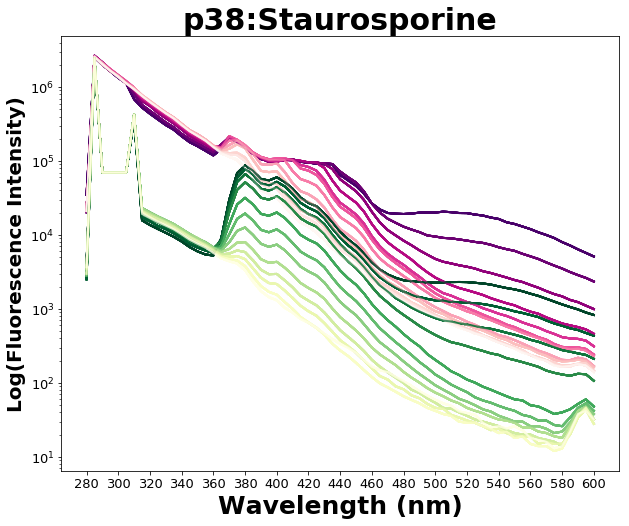

In [22]:
# buffer_color = current_palette[3]

fig,axes = plt.subplots(nrows=1,ncols=1,figsize=(10,8))

ncol=12
index = 0

# Plot fluorescence
for well in range(ncol):
    index = well + 1
    prot_well_name = 'A%s' % index
    buff_well_name = 'B%s' % index
    x_values = list(reads[0][label][prot_well_name].keys())
    color1 = cm.RdPu(np.linspace(0,1,12))
    color2 = cm.YlGn(np.linspace(0,1,12))
    color1 = np.flip(color1,axis=0)
    color2 = np.flip(color2,axis=0)
    for read, c in zip(Stauro_prot, color1):
        plt.semilogy(x_values, read, c=c, linestyle='solid', linewidth=2, alpha=0.75)
    for read, c in zip(Stauro_prot_SMH, color2):
        plt.semilogy(x_values, read, c=c, linestyle='solid', linewidth=2, alpha=0.75)
#     for read, c in zip(Stauro_buff, gray):
#         plt.semilogy(x_values, read, c=c, linestyle='dashed', linewidth=2, alpha=0.75)
    axes.xaxis.set_major_locator(plt.MaxNLocator(20))

    plt.title('p38:Staurosporine', fontsize=30, fontweight='bold')
    plt.xlabel('Wavelength (nm)', fontsize=25, fontweight='bold')
    plt.ylabel('Log(Fluorescence Intensity)', fontsize=20, fontweight='bold')
    plt.tick_params(axis='both', which='major', labelsize=13)
    

fig.savefig('20190328_overlap_stauro_p38_spectra_log_y.pdf', bbox_inches='tight', dpi=300)

In [24]:
filename_reread = ['p38_Sta_ab_gain75_reread_20190328_165939.xml']

datapath = 'infinite_results'

reads_reread = list()
nreads = len(filename_reread)
for read in range(nreads):
    read = platereader.read_icontrol_xml(os.path.join(datapath, filename_reread[read]))
    reads_reread.append(read)
    
print(reads_reread)

[{'ex280_scan_top_gain100': {'A1': {'280': '3095063', '285': '2506694', '290': '2063462', '295': '45358', '300': '56782', '305': '64265', '310': '66616', '315': '62058', '320': '56193', '325': '49540', '330': '42878', '335': '36422', '340': '30619', '345': '25322', '350': '20877', '355': '17293', '360': '14437', '365': '11482', '370': '9112', '375': '6787', '380': '4973', '385': '3568', '390': '2553', '395': '1988', '400': '1664', '405': '1324', '410': '1135', '415': '963', '420': '804', '425': '677', '430': '587', '435': '508', '440': '451', '445': '406', '450': '358', '455': '301', '460': '258', '465': '243', '470': '234', '475': '216', '480': '198', '485': '183', '490': '168', '495': '159', '500': '145', '505': '135', '510': '127', '515': '118', '520': '110', '525': '104', '530': '95', '535': '89', '540': '82', '545': '77', '550': '74', '555': '69', '560': '68', '565': '63', '570': '56', '575': '49', '580': '46', '585': '42', '590': '40', '595': '35', '600': '34'}, 'A2': {'280': '30

In [25]:
Stauro_prot_reread = np.zeros([12, 65])
Stauro_buff_reread = np.zeros([12, 65])
ncol = 12

label = 'ex296_scan_top_gain100'

for well in range(ncol):
    index = well + 1
    prot_well_name = 'A%s' % index
    buff_well_name = 'B%s' % index
    
    measurements_prot = list(reads_reread[0]['ex296_scan_top_gain100'][prot_well_name].values())
    measurements_prot = [i if i != 'OVER' else 70000 for i in measurements_prot] 
    measurements_buff = list(reads_reread[0]['ex296_scan_top_gain100'][buff_well_name].values())
    measurements_buff = [i if i != 'OVER' else 0 for i in measurements_buff] 
    
    Stauro_prot_reread[well] = np.array(measurements_prot)
    Stauro_buff_reread[well] = np.array(measurements_buff)
    print(prot_well_name)
    print(Stauro_prot_reread[well])

A1
[4.069000e+03 2.413926e+06 2.012946e+06 1.648203e+06 1.346886e+06
 1.129982e+06 4.546300e+04 2.141300e+04 1.964600e+04 1.775400e+04
 1.649300e+04 1.508000e+04 1.320200e+04 1.178100e+04 1.048300e+04
 9.371000e+03 7.939000e+03 6.733000e+03 5.475000e+03 4.339000e+03
 3.162000e+03 2.320000e+03 1.713000e+03 1.368000e+03 1.176000e+03
 9.840000e+02 8.670000e+02 7.250000e+02 6.260000e+02 5.380000e+02
 4.800000e+02 4.340000e+02 3.930000e+02 3.580000e+02 3.180000e+02
 2.750000e+02 2.360000e+02 2.230000e+02 2.100000e+02 1.940000e+02
 1.790000e+02 1.630000e+02 1.510000e+02 1.410000e+02 1.320000e+02
 1.210000e+02 1.130000e+02 1.040000e+02 9.700000e+01 9.200000e+01
 8.700000e+01 8.000000e+01 7.500000e+01 6.900000e+01 6.300000e+01
 6.100000e+01 5.700000e+01 5.300000e+01 4.800000e+01 4.400000e+01
 4.200000e+01 4.100000e+01 4.200000e+01 3.900000e+01 3.300000e+01]
A2
[1.905000e+03 1.888524e+06 1.994754e+06 1.648100e+06 1.323940e+06
 1.107737e+06 4.201900e+04 2.451200e+04 2.199500e+04 1.946600e+04
 1.

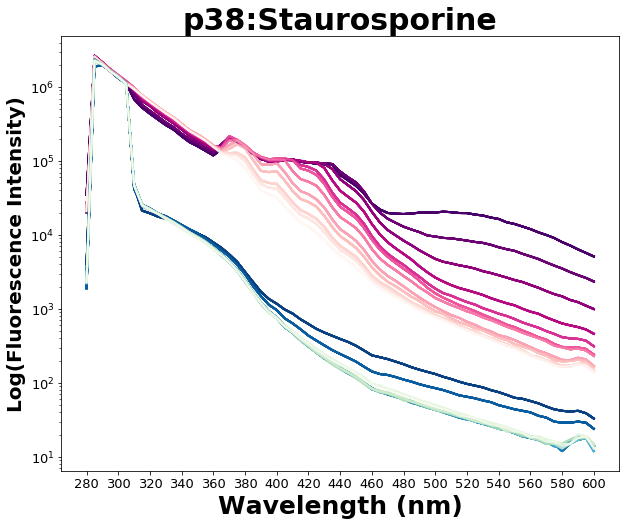

In [26]:
# buffer_color = current_palette[3]

fig,axes = plt.subplots(nrows=1,ncols=1,figsize=(10,8))

ncol=12
index = 0

# Plot fluorescence
for well in range(ncol):
    index = well + 1
    prot_well_name = 'A%s' % index
    buff_well_name = 'B%s' % index
    x_values = list(reads[0][label][prot_well_name].keys())
    color1 = cm.RdPu(np.linspace(0,1,12))
    color2 = cm.GnBu(np.linspace(0,1,12))
    color1 = np.flip(color1,axis=0)
    color2 = np.flip(color2,axis=0)
    for read, c in zip(Stauro_prot, color1):
        plt.semilogy(x_values, read, c=c, linestyle='solid', linewidth=2, alpha=0.75)
    for read, c in zip(Stauro_prot_reread, color2):
        plt.semilogy(x_values, read, c=c, linestyle='solid', linewidth=2, alpha=0.75)
#     for read, c in zip(Stauro_buff, gray):
#         plt.semilogy(x_values, read, c=c, linestyle='dashed', linewidth=2, alpha=0.75)
    axes.xaxis.set_major_locator(plt.MaxNLocator(20))

    plt.title('p38:Staurosporine', fontsize=30, fontweight='bold')
    plt.xlabel('Wavelength (nm)', fontsize=25, fontweight='bold')
    plt.ylabel('Log(Fluorescence Intensity)', fontsize=20, fontweight='bold')
    plt.tick_params(axis='both', which='major', labelsize=13)
    

fig.savefig('20190328_overlap2_stauro_p38_spectra_log_y.pdf', bbox_inches='tight', dpi=300)